Validando muestras aleatorias:

============================== Muestra 1/10 ==============================


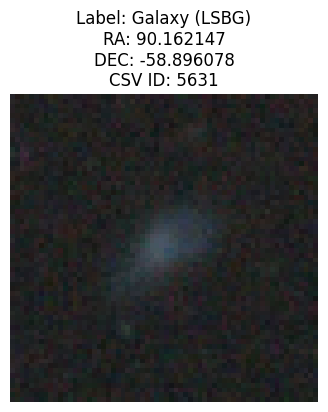


Imagen: 90.162147_-58.896078_5631_256pix.jpeg
Coordenadas: RA=90.162147, DEC=-58.896078
Etiqueta: 1 (Galaxy (LSBG))
Coincidencia en CSV: Sí

============================== Muestra 2/10 ==============================


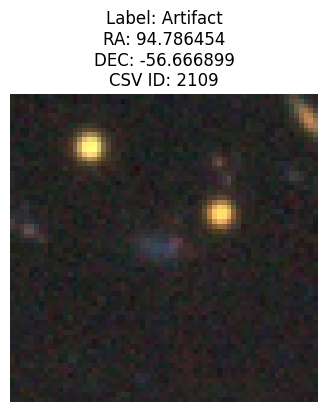


Imagen: 94.786454_-56.666899_2109_256pix.jpeg
Coordenadas: RA=94.786454, DEC=-56.666899
Etiqueta: 0 (Artifact)
Coincidencia en CSV: Sí

============================== Muestra 3/10 ==============================


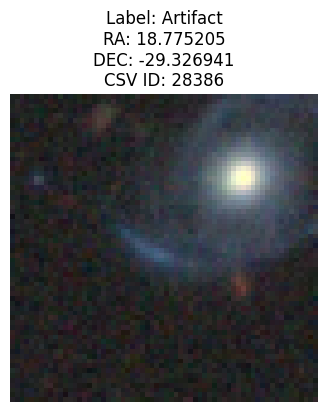


Imagen: 18.775205_-29.326941_28386_256pix.jpeg
Coordenadas: RA=18.775205, DEC=-29.326941
Etiqueta: 0 (Artifact)
Coincidencia en CSV: Sí

============================== Muestra 4/10 ==============================


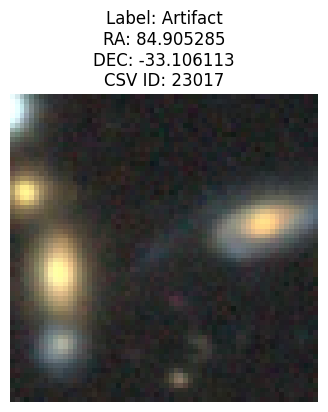


Imagen: 84.90528499999998_-33.106113_23017_256pix.jpeg
Coordenadas: RA=84.905285, DEC=-33.106113
Etiqueta: 0 (Artifact)
Coincidencia en CSV: Sí

============================== Muestra 5/10 ==============================


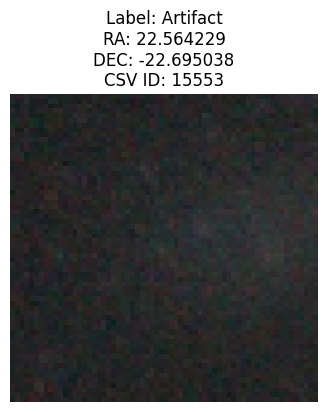


Imagen: 22.564229_-22.695038_15553_256pix.jpeg
Coordenadas: RA=22.564229, DEC=-22.695038
Etiqueta: 0 (Artifact)
Coincidencia en CSV: Sí

============================== Muestra 6/10 ==============================


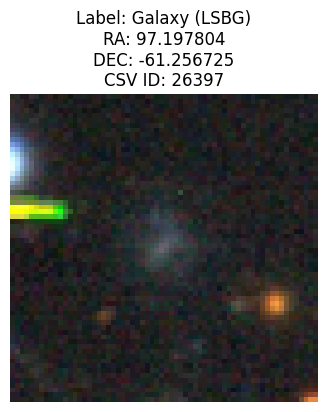


Imagen: 97.197804_-61.256725_26397_256pix.jpeg
Coordenadas: RA=97.197804, DEC=-61.256725
Etiqueta: 1 (Galaxy (LSBG))
Coincidencia en CSV: Sí

============================== Muestra 7/10 ==============================


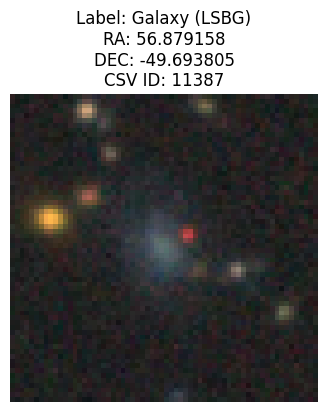


Imagen: 56.879158_-49.693805_11387_256pix.jpeg
Coordenadas: RA=56.879158, DEC=-49.693805
Etiqueta: 1 (Galaxy (LSBG))
Coincidencia en CSV: Sí

============================== Muestra 8/10 ==============================


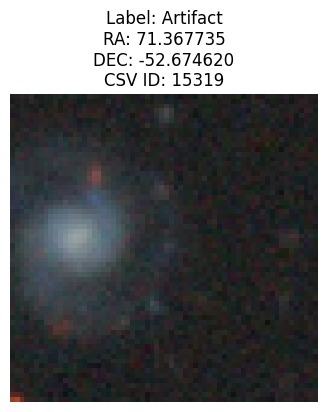


Imagen: 71.367735_-52.67462_15319_256pix.jpeg
Coordenadas: RA=71.367735, DEC=-52.67462
Etiqueta: 0 (Artifact)
Coincidencia en CSV: Sí

============================== Muestra 9/10 ==============================


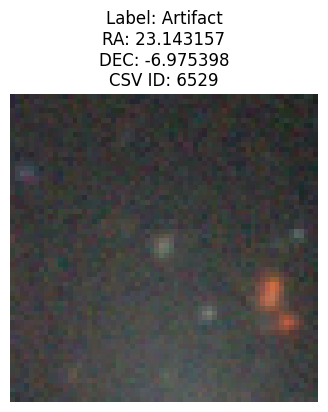


Imagen: 23.143157_-6.975397999999998_6529_256pix.jpeg
Coordenadas: RA=23.143157, DEC=-6.975398
Etiqueta: 0 (Artifact)
Coincidencia en CSV: Sí

============================== Muestra 10/10 ==============================


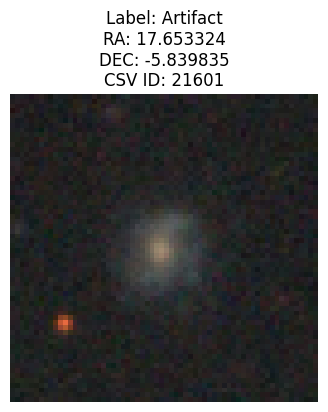


Imagen: 17.653323999999994_-5.839835_21601_256pix.jpeg
Coordenadas: RA=17.653324, DEC=-5.839835
Etiqueta: 0 (Artifact)
Coincidencia en CSV: Sí


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# 1. Cargar datos
BASE_DIR = '../Datasets_DeepShadows/'

# Cargar imágenes y etiquetas
X_tr = np.load(f"{BASE_DIR}/array_images/X_training.npy")
y_tr = np.load(f"{BASE_DIR}/Galaxies_data/y_train.npy")

# Cargar CSV original para comparar coordenadas
train_csv = pd.read_csv(f"{BASE_DIR}/Datasets/Baseline_training.csv")

# 2. Función para parsear nombres de archivo (ajustada a tu formato)
def parse_filename(filename):
    match = re.match(r'^([\d\.\-]+)_([\d\.\-]+)_\d+_256pix\.jpe?g', filename, re.IGNORECASE)
    if match:
        try:
            ra = round(float(match.group(1)), 6)
            dec = round(float(match.group(2)), 6)
            return (ra, dec)
        except ValueError:
            return (None, None)
    return (None, None)

# 3. Obtener nombres de archivo y sus coordenadas
jpeg_dir = f"{BASE_DIR}/Jpeg_data/Training/"
image_files = [f for f in os.listdir(jpeg_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Mapeo de coordenadas a nombre de archivo
coord_to_file = {}
for f in image_files:
    ra, dec = parse_filename(f)
    if ra is not None and dec is not None:
        coord_to_file[(ra, dec)] = f

# 4. Encontrar coincidencias entre imágenes y CSV
def find_matching_rows(ra, dec):
    """Encuentra fila correspondiente en el CSV"""
    return train_csv[
        (train_csv['ra'].round(6) == ra) & 
        (train_csv['dec'].round(6) == dec)
    ]

# 5. Función para validar muestras específicas
def validate_sample(index):
    """Valida una muestra específica mostrando imagen, coordenadas y etiqueta"""
    label = y_tr[index]
    label_name = "Galaxy (LSBG)" if label == 1 else "Artifact"
    
    # Obtener coordenadas de la imagen
    ra, dec = parse_filename(image_files[index])
    
    # Buscar en CSV
    csv_match = find_matching_rows(ra, dec)
    if not csv_match.empty:
        obj_id = csv_match.index[0]
    else:
        obj_id = "No match found"
    
    # Mostrar imagen con metadatos
    plt.figure(figsize=(4, 4))
    plt.imshow(X_tr[index])
    plt.axis('off')
    plt.title(f"Label: {label_name}\nRA: {ra:.6f}\nDEC: {dec:.6f}\nCSV ID: {obj_id}")
    plt.show()
    
    # Imprimir detalles
    print(f"\nImagen: {image_files[index]}")
    print(f"Coordenadas: RA={ra}, DEC={dec}")
    print(f"Etiqueta: {label} ({label_name})")
    print("Coincidencia en CSV:", "Sí" if not csv_match.empty else "No")

# 6. Validar muestras aleatorias
num_samples = 10
random_indices = np.random.randint(0, len(X_tr), num_samples)

print("Validando muestras aleatorias:")
for i, idx in enumerate(random_indices):
    print(f"\n{'='*30} Muestra {i+1}/{num_samples} {'='*30}")
    validate_sample(idx)